In [31]:
import json
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from matplotlib.container import BarContainer
import numpy as np

In [32]:
# Data structure:
# dictionary with experiment names as keys ("1", "2", ...) and lists of probabilistic evaluations of all individuals as items.
# A probabilistic evaluation for one individual is composed of two confidence intervals estimating the unsafe region of both members

with open('experiment-MNIST-FSE/HQ/probabilistic_eval.json') as f:
    data: dict = json.loads(f.read())


def interval_intersect(a,b):
    a0,a1 = a
    b0,b1 = b
    return max(0,min(a1,b1)-max(a0,b0))


results = {}
experiments = []
same_regions = []
different_regions = []
totals = []
different_region_distances = []
for experiment, individuals_eval in data.items():
    same_region = 0
    different_region = 0
    for region_ci_member1, region_ci_member2 in individuals_eval:
        intersect = interval_intersect(region_ci_member1, region_ci_member2)
        
        lb1, ub1 = region_ci_member1
        lb2, ub2 = region_ci_member2
        region_estimator_member1 = lb1 + (ub1 - lb1) / 2.
        region_estimator_member2 = lb2 + (ub2 - lb2) / 2.

        dist = abs(region_estimator_member2 - region_estimator_member1)
        
        if intersect > 0:
            same_region += 1
        else:
            different_region += 1
            different_region_distances.append(dist)
    
    # Data for matplotlib
    experiments.append(experiment)
    same_regions.append(same_region)
    different_regions.append(different_region)
    totals.append(same_region + different_region)

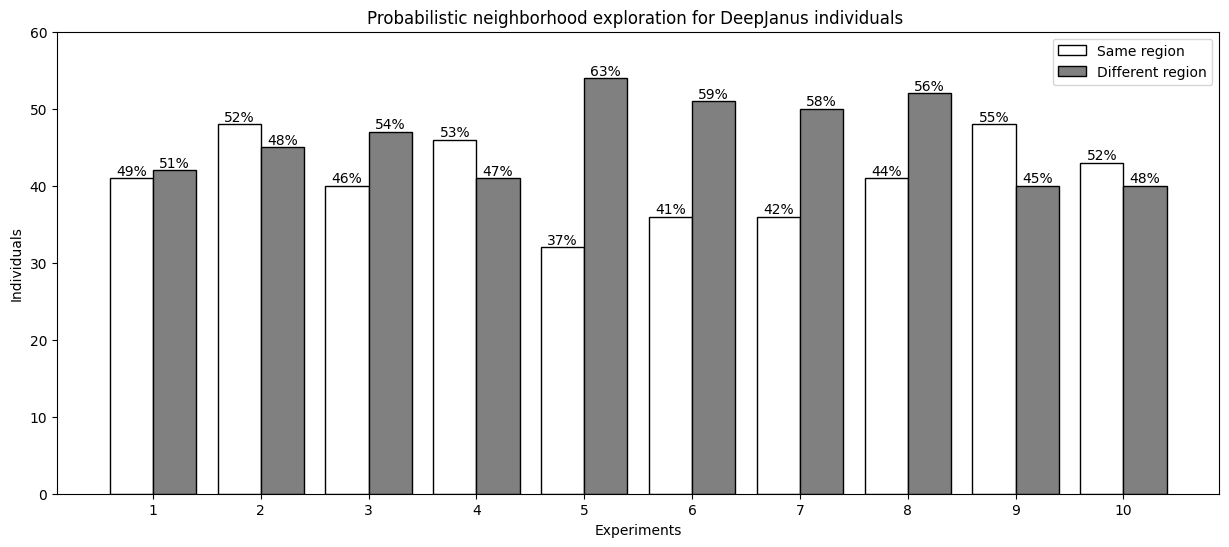

In [33]:
def plot_bars(ax: Axes, indexes: list[float], eval_result, label, width=0.4, color='white', hatch=None):
    bar_vcenter = lambda b : b.get_x() + b.get_width() / 2.0
    bar_htop = lambda b : b.get_y() + b.get_height()
    bar_hbottom = lambda b : b.get_y()
    
    # Bottom bar
    bar_container: BarContainer = ax.bar(indexes, eval_result[0], width, label=label, edgecolor='black', color=color, hatch=hatch)
    
    # # Member name inside bottom bar
    # for bar in bar_container:
    #     ax.text(bar_vcenter(bar), bar_hbottom(bar), mbr, ha='center', va='bottom')
    # 
    # # Top bar
    # bar_container: BarContainer = ax.bar(indexes, eval_result['in'], width, label='Inside frontier', bottom=eval_result['out'], edgecolor='black', color='white')
    
    # Percentage number over the bars
    perc_str = list(map(lambda p : f'{round(p * 100)}%', eval_result[1]))
    for i in range(len(bar_container)):
        bar = bar_container[i]
        ax.text(bar_vcenter(bar), bar_htop(bar), perc_str[i], ha='center', va='bottom')


fig: Figure
ax: Axes
fig, ax = plt.subplots(figsize=(15,6))

indices = np.arange(len(experiments))
bar_width = 0.4
# Plot bars representing the results
plot_bars(ax, indices, (same_regions, np.divide(same_regions, totals)), "Same region", bar_width)
plot_bars(ax, indices + bar_width, (different_regions, np.divide(different_regions, totals)), "Different region", bar_width, color='grey')

# Set axis properties
ax.xaxis.set_ticks(indices + bar_width / 2, experiments)
ax.set_ylim(0, 60)
ax.set_title('Probabilistic neighborhood exploration for DeepJanus individuals ')
ax.set_xlabel('Experiments')
ax.set_ylabel('Individuals')

# Remove duplicated entries from legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
_ = ax.legend(by_label.values(), by_label.keys(), loc="upper right")

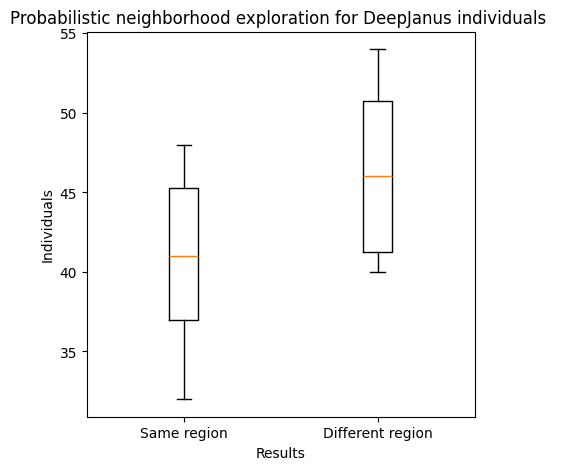

In [34]:
fig, ax = plt.subplots(figsize=(5,5))

# Boxplot summarizing the results
ax.boxplot((same_regions, different_regions), labels=('Same region', 'Different region'))

# Set axis properties
ax.set_title('Probabilistic neighborhood exploration for DeepJanus individuals ')
ax.set_xlabel('Results')
_ = ax.set_ylabel('Individuals')

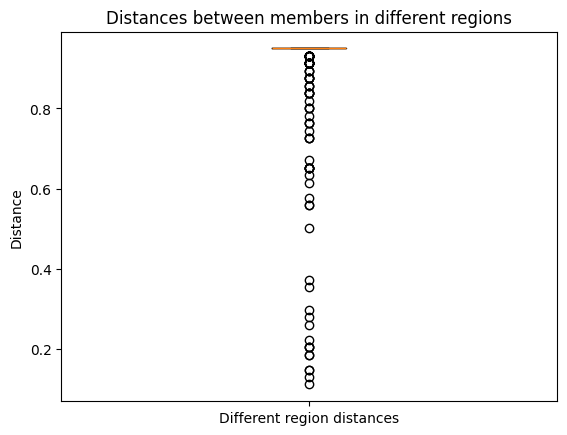

In [35]:
fig, ax = plt.subplots()

# Boxplot summarizing the results
ax.boxplot(different_region_distances, labels=('Different region distances',))

# Set axis properties
ax.set_title('Distances between members in different regions')
_ = ax.set_ylabel('Distance')

In [36]:
different_region_distances

[0.9496226407911138,
 0.8937624854504601,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9310025890108958,
 0.20482056958239708,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.8565223818900243,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.8937624854504601,
 0.9496226407911138,
 0.7261820194284988,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.9496226407911138,
 0.949622640